<a href="https://colab.research.google.com/github/dua-harshit/Exploratory-Data-Analysis---Retail/blob/main/ExploratoryDataAnalysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Retail**

As a Business Manager,
1. We have to find out weak areas of business where we can make more profit
2. What business problems can be determined from this data?


---



In [1]:
# Importing all the Libraries
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
url = 'https://raw.githubusercontent.com/dua-harshit/Exploratory-Data-Analysis---Retail/main/SampleSuperstore.csv'
df = pd.read_csv(url)

### **Scoping the data:**

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### **Checking the Dimensions of the Data frame:**

In [4]:
df.shape 

(9994, 13)

The data has 9994 datapoints and 13 features.




## **Summarising the Dataframe:**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Number of numerical features = 5

Number of categorical categorical columns = 8

## **Checking for null values:**

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing values in any column.

## **Checking for Duplicate values and dropping them**

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum() # to check if duplicates have been dropped

0

## **Checking for unique values:**

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Postal Code are not needed. So dropping that column 

In [10]:
col=['Postal Code']
df1=df.drop(columns=col, axis=1)

### **Checking the summary statistics**

In [11]:
df1.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


The minimum and maximum sales made in the superstore was that of 0 and 22638 respectively.

The minimum and maximum quantity sold in the superstore was that of 1 and 14 units respectively.

The minimum and maximum discount given in the superstore was that of 0 and 0.80 respectively.

The minimum and maximum profit made in the superstore was that of -6600 (loss) and 8394 respectively.





### **Visualising with Histograms**

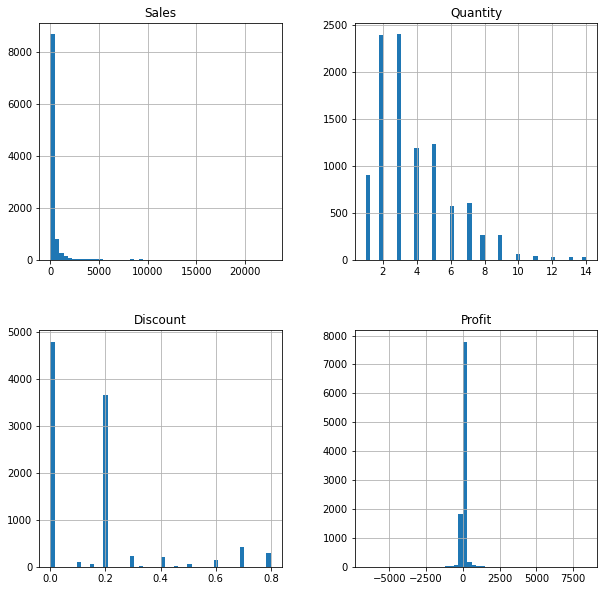

In [12]:
df1.hist(figsize=(10, 10), bins=50)
plt.show()

### **Pairplots between the Sales, Quantity, Discount rate and Profit**

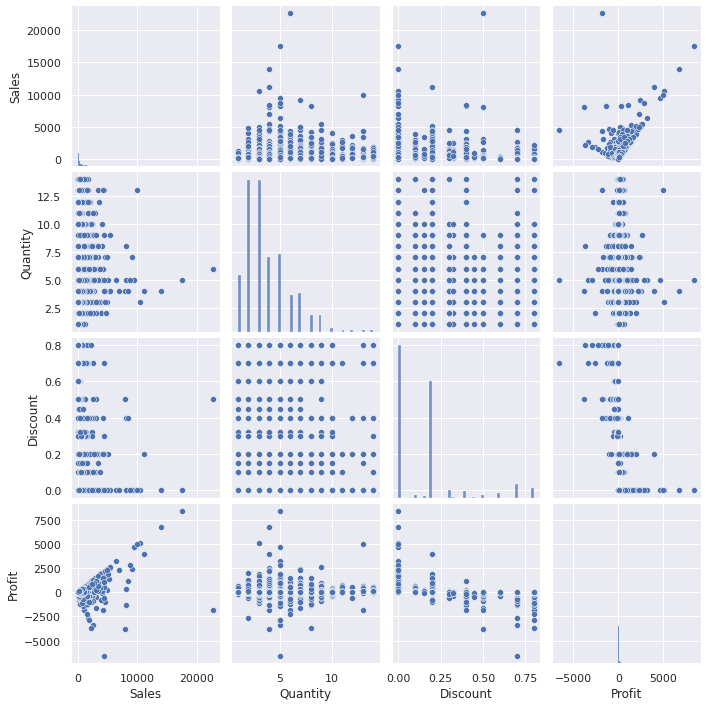

In [13]:
sns.set()
sns.pairplot(df1, height = 2.5)
plt.show()

### **Correlation between the Sales, Quantity, Discount rate and Profit**

In [14]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


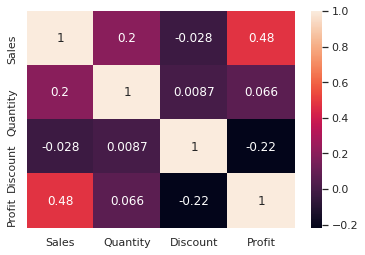

In [15]:
corr = df1.corr()
sns.heatmap(corr,annot=True)

The highly correlated features are Sales, Discount and Profit.

## **Univariate Analysis**
**Catagorical Columns**

### **Plotting the Number of Orders for each Ship Mode**

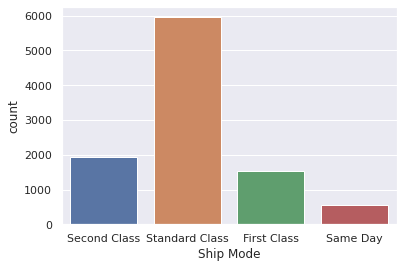

In [16]:
sns.countplot(data = df1, x = 'Ship Mode')
plt.show()

Standard Class of Ship Mode is mostly preferred by the consumers.


### **Plotting the Number of Orders for each Segment**

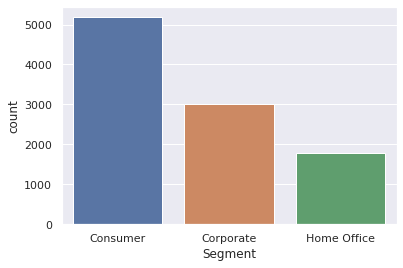

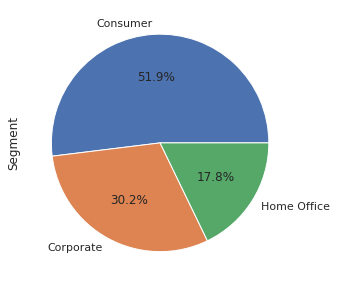

In [17]:
sns.countplot(data = df1, x ='Segment')
plt.show()
plt.figure(figsize = (5,5))
df1['Segment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Consumer segment is in higher demand for personal use followed by Corporate and Home Office Segment.

### **Plotting the Number of Orders for each Region**

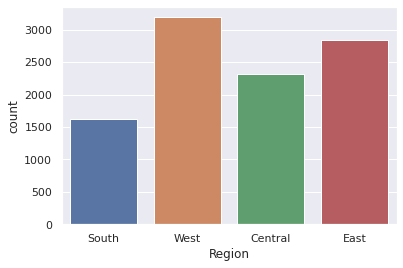

In [18]:
sns.countplot(data = df1 , x = 'Region')
plt.show()

The demand for products is much higher in the West region follwed by East, Central and South Region.


### **Plotting the Number of Orders for each Category**

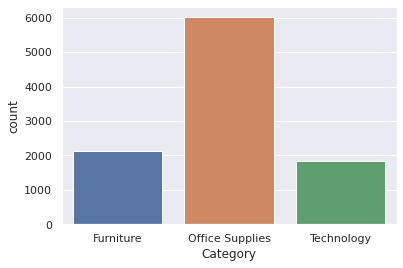

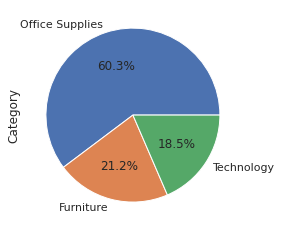

In [19]:
sns.countplot(data = df1, x= 'Category')
plt.show()
df1['Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Customers are mostly purchasing Office Supplies for respective jobs followed by Furniture and Technology.

### **Plotting the number of orders based on sub-category**

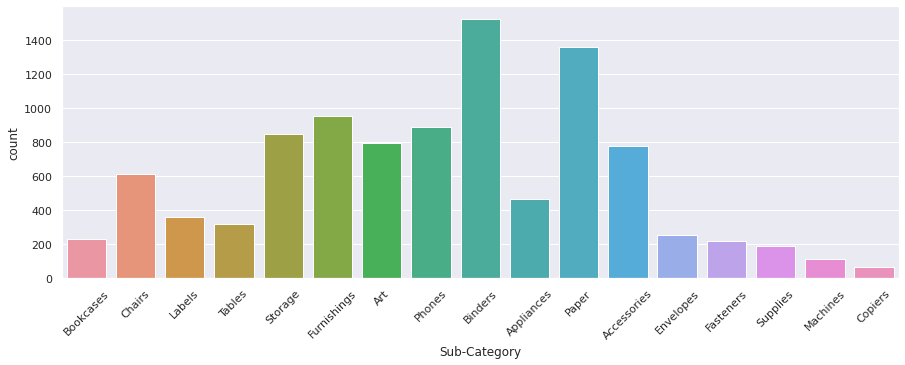

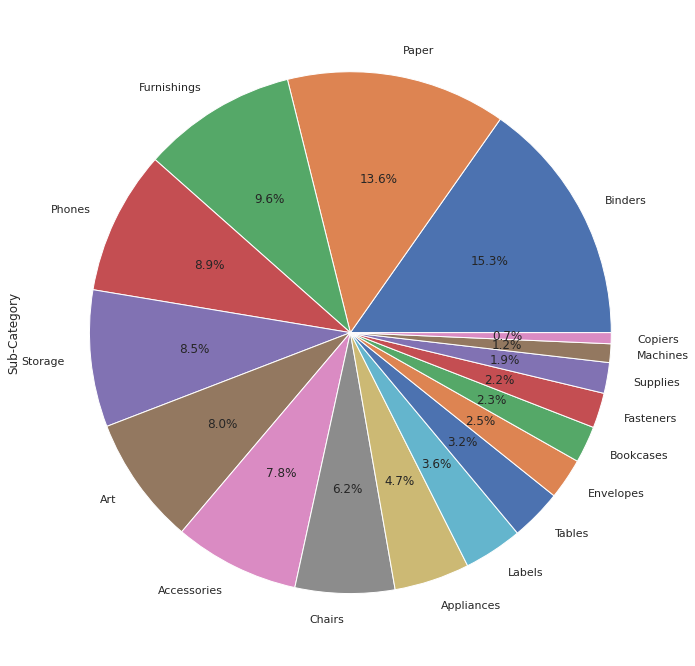

In [20]:
sns.set(font_scale=1)
plt.figure(figsize =(15,5))
sns.countplot(x = 'Sub-Category', data = df1)
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12,12))
df1['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Consumption amongst customers has mostly increased for Binders, Papers, Furnishings, Phones and Storage equipment.

### **Plotting the orders from each State**

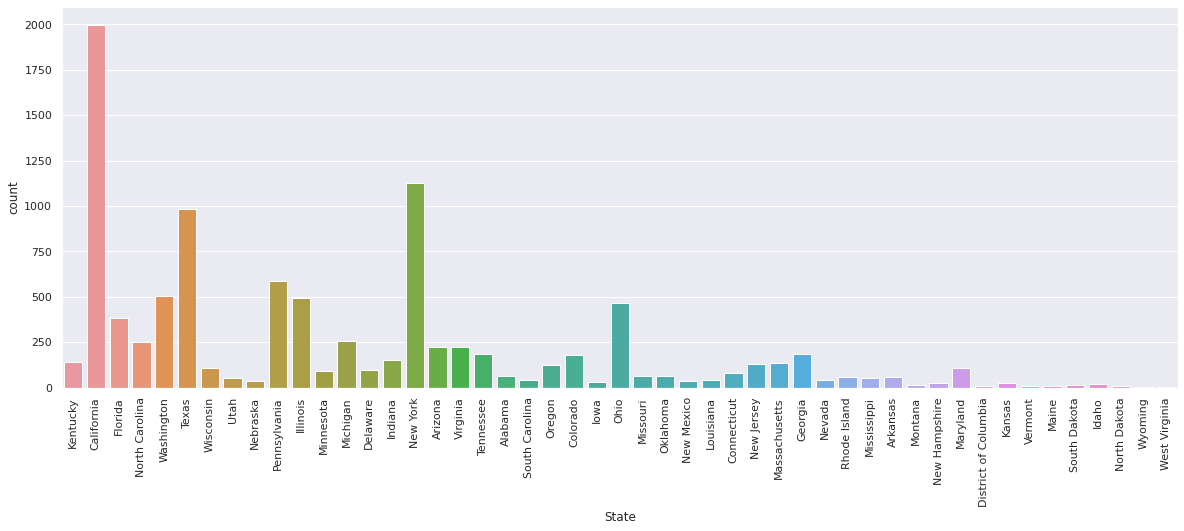

In [21]:
sns.set(font_scale=1)
plt.figure(figsize =(20,7))
sns.countplot(x = 'State', data=df1)
plt.xticks(rotation = 90)
plt.show()

The customers are mostly from the state of California, NY City, Texas, Pennsylvania and Washington.

### **Plotting on the basis of Shipping Mode**

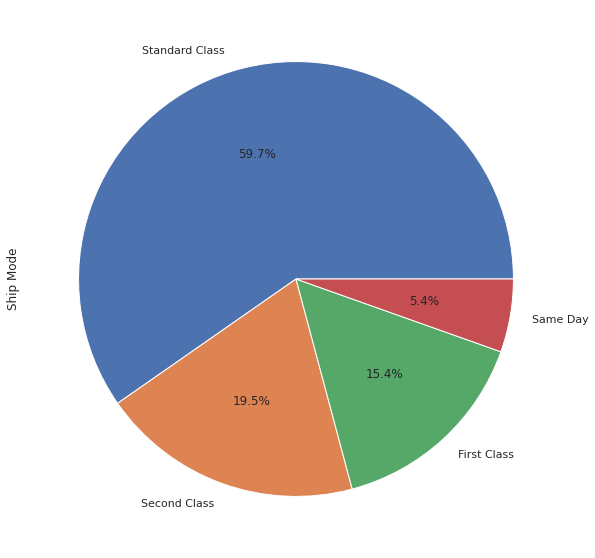

In [22]:
plt.figure(figsize = (10,10))
df1['Ship Mode'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Almost 60% of the customers prefer standard class shipping mode for delivery of their products.

## **Bivariate Analysis**
It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. 

### **Profit vs Sales**

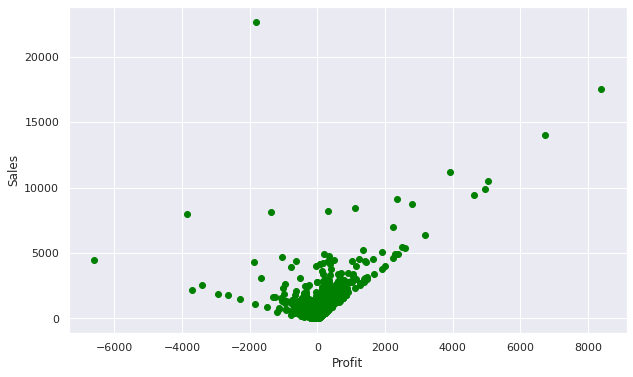

In [23]:
plt.figure(figsize = [10,6])
plt.scatter(df1.Profit , df1.Sales , color = 'green')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

Profits have been made where the sales have bigger in number and there are multiple instances for the same.

There are less instances for losses but they significant. This could be due to poor sales or not worth of money.

### **Discount vs Sales**

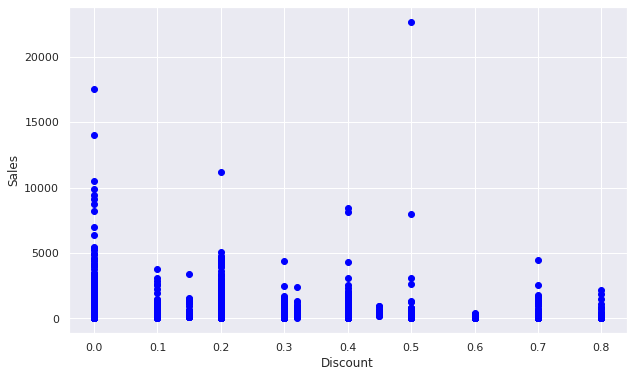

In [24]:
plt.figure(figsize = [10,6])
plt.scatter(df1.Discount , df1.Sales , color = 'blue')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

Most of the sales have been done on 0% discount.

However we can see that variuos discount have been offered at multiple instances. This could be beacause of bulk purchase or high end equipment.

### **Discount vs Profit** 

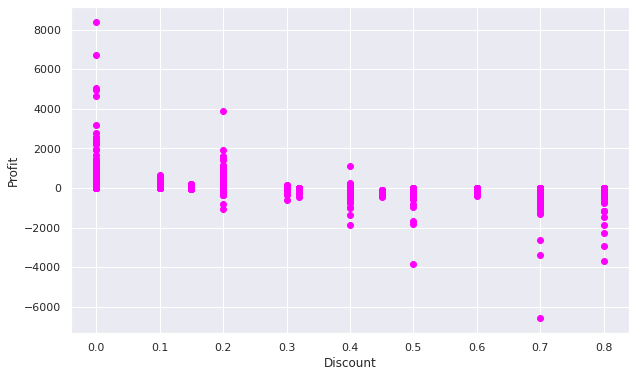

In [25]:
plt.figure(figsize = [10,6])
plt.scatter(df1.Discount , df1.Profit , color = 'magenta')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

It is evident that  with no or low discounts, profit is higher comapred to when Discount is high it has led to losses, which is somthing unexpected.


### **Quantity vs Sales**

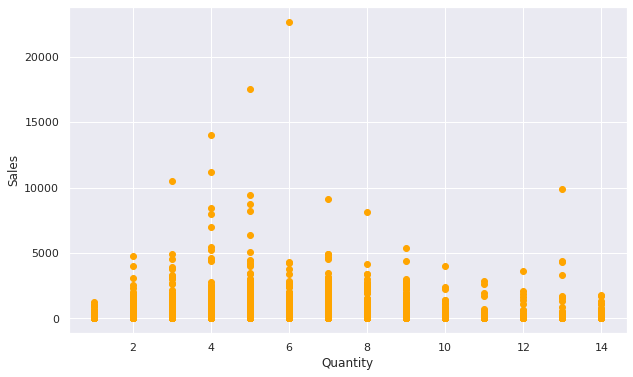

In [26]:
plt.figure(figsize = [10,6])
plt.scatter(df1.Quantity , df1.Sales , color = 'orange')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

Maximum sales made are with a quanity of 4 to 5 items.

### **Quanitity vs Profit**

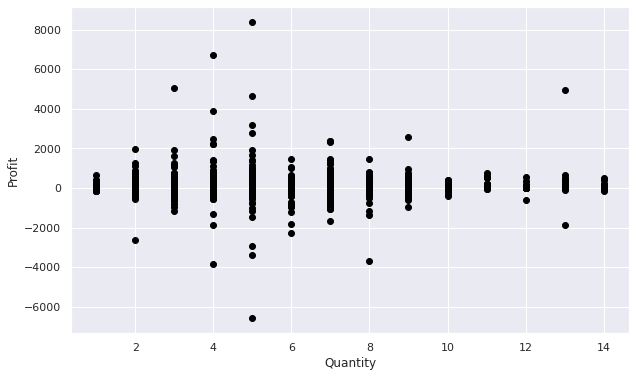

In [27]:
plt.figure(figsize = [10,6])
plt.scatter(df1.Quantity , df1.Profit , color = 'black')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()

The profit and loss are in equal proportion. 

When quantity of products bought is 4 or 5 the profit is maximum.

### **State- Wise Sales**

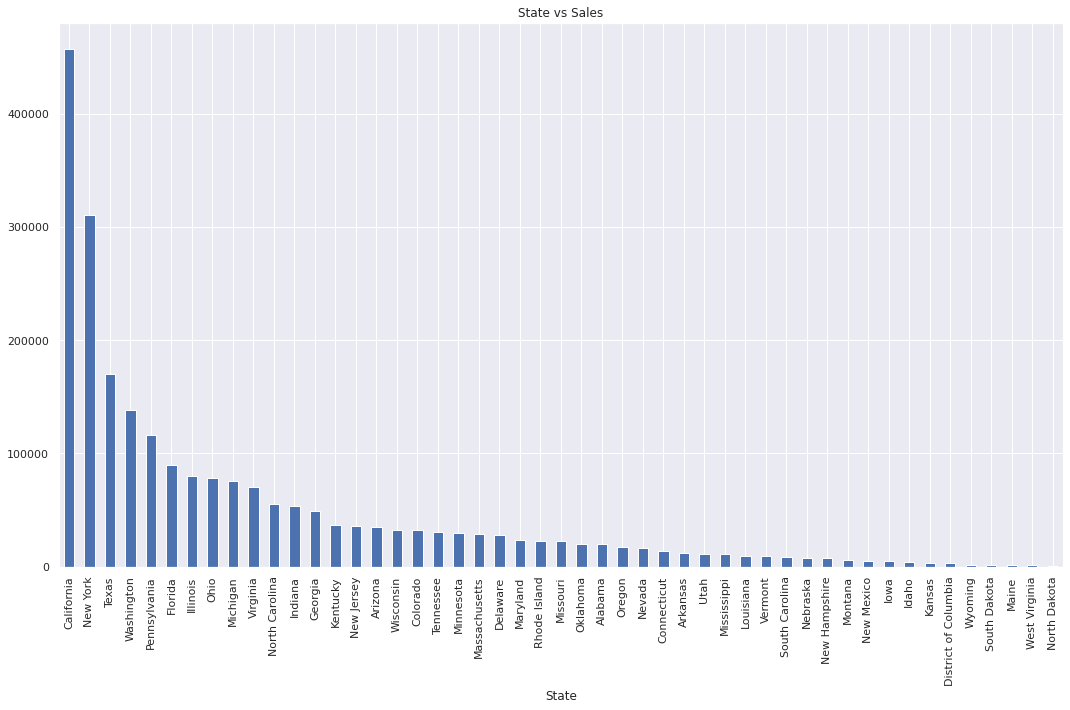

In [29]:
sample = df1.groupby(['State'])['Sales'].sum()
sample.sort_values(ascending = False, inplace = True)
fig,ax = plt.subplots(figsize = (18,10)) 
plt.title('State vs Sales')
sample.plot.bar()

California, New York, Texas, Washington and Pennsylvania are the states with the highest sales respectively.

North Dakota, West Virginia, Maine are the states with the loswest sales.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


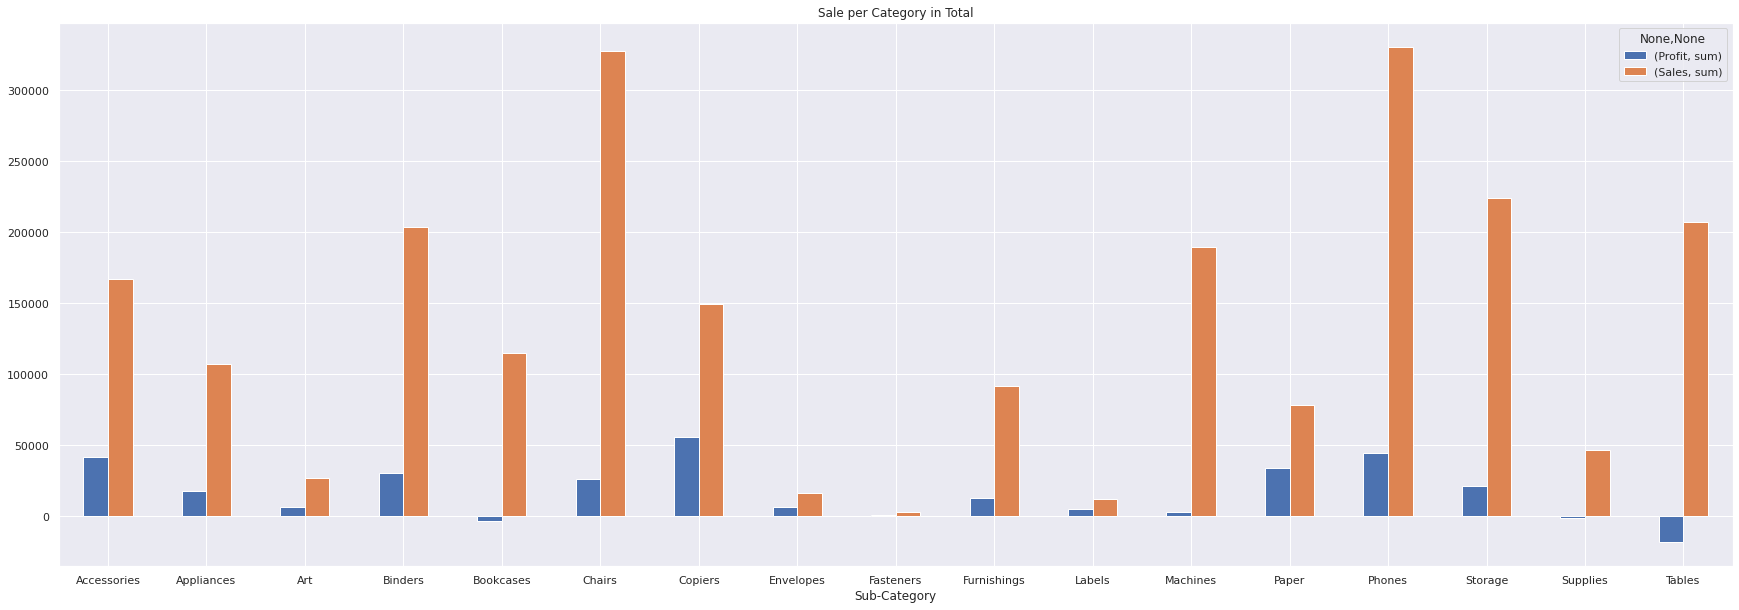

In [39]:
sample = df1.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
sample.plot.bar(rot = 0, title = 'Sale per Category in Total', figsize = (30,10))
plt.show(block = True)

**Objective 1 : As a business manager, try to find out the weak areas where you can work to make more profit.** 
*  A list of consumable and non consumable items should be created.
*  The data of the North Region is missing.
*  More variety of profucts should be present in the Home office Segment.
*  There should be presence of combo deals in the store.
*  Seperate list of items should be added which are in hot demand.

**Objective 2 : What all business problems you can derive by exploring the data?**

* State Codes should be available in order to better interpret the data.

* Postal Code having too many unique values leads to difficulty in getting good insights.
* There should be presence of a column stating whether more customers came in during festive season or under normal ciscumstances.
* The items can be labeled in which segment they come under so as to better understand the dataset.
* City column should also be removed as it consists of too many unique values.
* There should be column of rating as well 1 to 5, whihc gives us information, which product customer is likely to purchase.